In [1]:
import numpy as np
import pandas as pd

In [2]:
# data_west = pd.read_excel("West_Bengal_filter.xlsx",sheet_name="Sheet1")
# data_telangana = pd.read_excel("Telangana_filter.xlsx",sheet_name="Sheet1")
# data_tamil = pd.read_excel("Tamil_Nadu_filter.xlsx",sheet_name="Sheet1")
# data_rajasthan = pd.read_excel("Rajasthan_filter.xlsx",sheet_name="Sheet1")
# data_andhra = pd.read_excel("Andhra_Pradesh_filter.xlsx",sheet_name="Sheet1")

In [3]:
# final_data = pd.concat([data_andhra,data_rajasthan,data_tamil,data_telangana,data_west], axis=0)

In [4]:
# final_data.head()

In [5]:
# final_data.count()

In [6]:
# final_data = final_data.dropna(axis=0)
# final_data.count()

In [7]:
# final_data = final_data.astype(float)
# final_data.info()

In [8]:
# final_data.corr()

In [9]:
# final_data['Bin_Fluoride'] = np.where( final_data['FLUORIDE'] >= 1,1,0)
# final_data['Bin_Fluoride'].value_counts()

In [10]:
# final_data.head()

In [11]:
# final_data = final_data.drop(['FLUORIDE'],axis=1)

In [12]:
# final_data.shape

In [13]:
# data = final_data

In [14]:
# final_data = final_data.sample(frac=1)
# final_data

In [15]:
# x = final_data.drop(['Bin_Fluoride'],axis=1)
# x

In [16]:
# y = final_data[:]['Bin_Fluoride']
# y

In [17]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# x_train.to_excel("final_x_train.xlsx",sheet_name='Sheet1',index=False)
# y_train.to_excel("final_y_train.xlsx",sheet_name='Sheet1',index=False)
# x_test.to_excel("final_x_test.xlsx",sheet_name='Sheet1',index=False)
# y_test.to_excel("final_y_test.xlsx",sheet_name='Sheet1',index=False)

In [19]:
x_train = pd.read_excel("final_x_train.xlsx",sheet_name="Sheet1")
y_train = pd.read_excel("final_y_train.xlsx",sheet_name="Sheet1")
x_test = pd.read_excel("final_x_test.xlsx",sheet_name="Sheet1")
y_test = pd.read_excel("final_y_test.xlsx",sheet_name="Sheet1")

In [20]:
# x_train,x_test=x[:10000],x[10000:]
x_train.shape

(15472, 7)

In [21]:
x_test.shape

(2864, 7)

In [22]:
# y_train,y_test=y[:10000],y[10000:]
y_train.value_counts()

Bin_Fluoride
0               7736
1               7736
dtype: int64

In [23]:
y_test.value_counts()

Bin_Fluoride
0               1949
1                915
dtype: int64

# ***Resample Test data***

In [24]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=12)
# x_train,y_train = sm.fit_resample(x_train,y_train)

In [25]:
# x_train.info()

In [26]:
# y_train.info()

In [27]:
# y_train.value_counts()

# ***Appling ML models***

In [28]:
# random forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=19, random_state=10)

In [29]:
# # LogisticRegression

# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression()

In [30]:
# # KNN

# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=15)

In [31]:
# # xgboost

# from xgboost import XGBClassifier
# clf = XGBClassifier(n_estimators=100, learning_rate=0.05,max_depth=1, random_state=0)

In [32]:
# # native bayers -> GaussianNB

# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()

In [33]:
# # BernoulliNB

# from sklearn.naive_bayes import BernoulliNB
# clf = BernoulliNB(binarize=0.0)

In [34]:
# # SVM

# from sklearn.svm import SVC
# clf = SVC()

In [35]:
# # MLPClassifier

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [36]:
# # Disition Tree

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)

In [37]:
# # BaggingClassifier

# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=10)

In [38]:
# # VotingClassifier

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf3 = GaussianNB()
# clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [39]:
clf.fit(x_train, y_train)

/tmp/ipykernel_90602/3292451027.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=19, random_state=10)

In [40]:
y_test_predict_forest = clf.predict(x_test[:][:])
y_test_predict_forest

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_test_predict_forest)

array([[1535,  414],
       [ 384,  531]])

In [43]:
# after resampling
# [[2226,  665],
# [ 603,  823]]       19,10


In [44]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_test_predict_forest)

0.5619047619047619

In [45]:
recall_score(y_test,y_test_predict_forest)

0.580327868852459

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_predict_forest)

0.5709677419354838

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict_forest)

0.7213687150837989

/home/elite/Documents/CODING/PYTHON/ML/water analysis/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


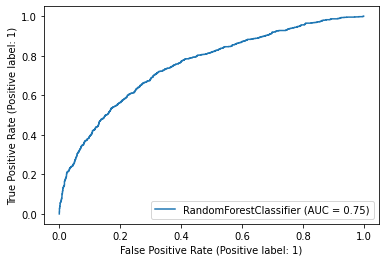

In [48]:
# ROC curve

import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test) 

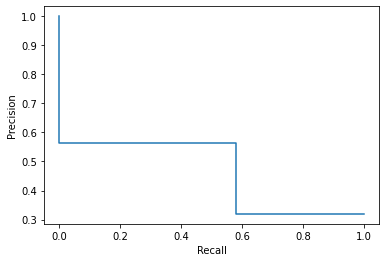

In [49]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, y_test_predict_forest)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [50]:
# without resampling
# [2629,  297], 
# [ 882,  509]]  10,10  
#  
# ([[2625,  301],
# [ 863,  528]])   12,10

# ([[2620,  306],
# [ 837,  554]])   14,10

# Modify data

In [51]:
# data.head()

In [52]:
# data['NA/CA'] = np.where(data['CA']!=0,data['NA']/data['CA'],0)
# data.head()

In [53]:
# data.count()

In [54]:
# data = data.dropna(axis=0)

In [55]:
# data.count()

In [56]:
# data = data.astype("f")
# data.info()

In [57]:
# data = data.sample(frac=1)
# data.head()

In [58]:
# x = data.drop(['Bin_Fluoride','CA','NA'],axis=1)
# x.head()

In [59]:
# y = data['Bin_Fluoride']
# y.head()

In [60]:
# x.info()

In [61]:
# x_train,x_test=x[:10000],x[10000:]
# x_train.shape

In [62]:
# x_test.shape

In [63]:
# y_train,y_test=y[:10000],y[10000:]
# y_train.shape

In [64]:
# y_test.shape